In [1]:
import sys
import os
import importlib
import json
import math
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu
from statsmodels.stats.multitest import multipletests
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

project_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(os.path.join(project_dir, 'src', 'utilities'))
import utilities as utils

dataset_config_path = os.path.join(
    project_dir, 'configs', 'datasets_config.json')
with open (dataset_config_path) as json_config:
    dataset_config_options = json.load(json_config)

In [2]:
# Import if using in a the notebook within a browser
# from IPython.core.display import HTML
# display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
# Run if changes are made to the datasets_config file or utilities
importlib.reload(utils)
with open (dataset_config_path) as json_config:
    dataset_config_options = json.load(json_config)

<module 'utilities' from 'c:\\Users\\Jonah\\Development\\churn-stats-ml-visualization\\src\\utilities\\utilities.py'>

In [4]:
dataset_key = 'telco-customer-churn'
dataset_config = dataset_config_options[dataset_key]
io_dir = os.path.join(project_dir, 'data', dataset_key)
processed_data_path = os.path.join(io_dir, 'processed', 'df.csv')

In [5]:
df = pd.read_csv(processed_data_path, index_col=0)

In [6]:
df.head()
df.describe()
df.info()
# Check for missing values
df.isna().sum()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,PhoneAndInternetService,MonthlyChargesQuartile,TotalChargesQuartile,TenureQuartile
CustomerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,No,Yes,Internet,0,0,0
5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,No,Yes,Both,1,2,2
3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,Yes,Yes,Both,1,0,0
7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,No,Yes,Internet,1,2,2
9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,Yes,Yes,Both,2,0,0


,Tenure,MonthlyCharges,TotalCharges,MonthlyChargesQuartile,TotalChargesQuartile,TenureQuartile
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,1.498509,1.499787,1.479199
std,24.559481,30.090047,2266.794470,1.117922,1.118304,1.128980
min,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.500000,398.550000,0.000000,0.000000,0.000000
50%,29.000000,70.350000,1394.550000,1.000000,1.000000,1.000000
75%,55.000000,89.850000,3786.600000,2.000000,2.500000,2.000000
max,72.000000,118.750000,8684.800000,3.000000,3.000000,3.000000


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   7043 non-null   object 
 1   SeniorCitizen            7043 non-null   object 
 2   Partner                  7043 non-null   object 
 3   Dependents               7043 non-null   object 
 4   Tenure                   7043 non-null   int64  
 5   PhoneService             7043 non-null   object 
 6   MultipleLines            7043 non-null   object 
 7   InternetServiceType      7043 non-null   object 
 8   OnlineSecurity           7043 non-null   object 
 9   OnlineBackup             7043 non-null   object 
 10  DeviceProtection         7043 non-null   object 
 11  TechSupport              7043 non-null   object 
 12  StreamingTV              7043 non-null   object 
 13  StreamingMovies          7043 non-null   object 
 14  Contract      

Gender                     0
SeniorCitizen              0
Partner                    0
Dependents                 0
Tenure                     0
PhoneService               0
MultipleLines              0
InternetServiceType        0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport                0
StreamingTV                0
StreamingMovies            0
Contract                   0
PaperlessBilling           0
PaymentMethod              0
MonthlyCharges             0
TotalCharges               0
Churn                      0
InternetService            0
PhoneAndInternetService    0
MonthlyChargesQuartile     0
TotalChargesQuartile       0
TenureQuartile             0
dtype: int64

#### Convert the quartile features to a string type so they are treated as categorical features for the purposes of the statistical tests
- These changes will not be saved to the file

In [7]:
df['TenureQuartile'] = df['TenureQuartile'].astype('str')
df['MonthlyChargesQuartile'] = df['MonthlyChargesQuartile'].astype('str')
df['TotalChargesQuartile'] = df['TotalChargesQuartile'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   7043 non-null   object 
 1   SeniorCitizen            7043 non-null   object 
 2   Partner                  7043 non-null   object 
 3   Dependents               7043 non-null   object 
 4   Tenure                   7043 non-null   int64  
 5   PhoneService             7043 non-null   object 
 6   MultipleLines            7043 non-null   object 
 7   InternetServiceType      7043 non-null   object 
 8   OnlineSecurity           7043 non-null   object 
 9   OnlineBackup             7043 non-null   object 
 10  DeviceProtection         7043 non-null   object 
 11  TechSupport              7043 non-null   object 
 12  StreamingTV              7043 non-null   object 
 13  StreamingMovies          7043 non-null   object 
 14  Contract      

### Data exploration
- Let's examine if any features clearly seperate churned vs retained customers
- Use a Chi^2 test of independence
- Use Cramer's V as to measure effect size
- Correct for multiple hypothesis testing

In [8]:
# target_variable will be used in several cells below
target_variable = 'Churn'
categorical_variables = []
for col in df.columns:
    if pd.api.types.is_string_dtype(df[col]) and col != target_variable:
        categorical_variables.append(col)
numerical_variables = []
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]) and col != target_variable:
        numerical_variables.append(col)
categorical_variables
numerical_variables

['Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetServiceType',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'InternetService',
 'PhoneAndInternetService',
 'MonthlyChargesQuartile',
 'TotalChargesQuartile',
 'TenureQuartile']

['Tenure', 'MonthlyCharges', 'TotalCharges']

In [9]:
alpha = 0.05
pvalues = []
all_results = []
significant_results = []
chi2_result_result_keys = ('statistic', 'pvalue', 'chi2_dof', 'expected_freq')
for cat_var in categorical_variables:
    cat_var_result = {'feature': cat_var}
    df_crosstab = pd.crosstab(df[cat_var], df[target_variable])
    chi2_result = chi2_contingency(df_crosstab.to_numpy())
    for i, key in enumerate(chi2_result_result_keys):
        cat_var_result[key] = chi2_result[i]
    # Use Cramer's V to measure effect size
    effect_size = utils.calculate_cramers_v(
        df_crosstab, cat_var_result['statistic'])
    cat_var_result['effect_size'], cat_var_result['interpretation'] = effect_size
    pvalues.append(cat_var_result['pvalue'])
    all_results.append(cat_var_result)
multiple_test_correction = multipletests(
    pvalues, alpha=alpha, method='bonferroni')
corrected_alpha = multiple_test_correction[3]
for results in all_results:
    if results['pvalue'] <= corrected_alpha:
        significant_results.append(results)
# Order by highest to lowest effect size
significant_results = sorted(significant_results, key=lambda x: x['effect_size'], reverse=True)

### Let's compare the feature with the greatest effect size vs the feature with the smallest effect size
- Effect size interpretation: The higher the effect size, the better that feature seperated churned from retained customers

In [10]:
# greatest effect size
ges = significant_results[0]
ges['feature']
f'Effect size: {ges['interpretation']}'
ges_actual_freq = pd.crosstab(df[ges['feature']], df[target_variable])
ges_expected_freq = pd.DataFrame(ges['expected_freq'],
                                 columns=ges_actual_freq.columns,
                                 index=ges_actual_freq.index).map(np.ceil).astype(np.int64)
'Actual frequenceis'
ges_actual_freq
'Expected frequenceis'
ges_expected_freq

# smallest effect size
ses = significant_results[-1]
ses['feature']
f'Effect size: {ses['interpretation']}'
ses_actual_freq = pd.crosstab(df[ses['feature']], df[target_variable])
ses_expected_freq = pd.DataFrame(ses['expected_freq'],
                                 columns=ses_actual_freq.columns,
                                 index=ses_actual_freq.index).map(np.ceil).astype(np.int64)
'Actual frequenceis'
ses_actual_freq
'Expected frequenceis'
ses_expected_freq

'Contract'

'Effect size: Medium'

'Actual frequenceis'

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


'Expected frequenceis'

Churn,No,Yes
Contract,,
Month-to-month,2847,1029
One year,1083,391
Two year,1246,450


'Partner'

'Effect size: Small'

'Actual frequenceis'

Churn,No,Yes
Partner,,
No,2441,1200
Yes,2733,669


'Expected frequenceis'

Churn,No,Yes
Partner,,
No,2675,967
Yes,2500,903


- It's not a perfect comparison since 'Contract' has 3 possible values and 'Partner' has 2
- However, we can still see that the actual and expected frequencies for 'Contract' differ more than the actual and expected frequencies for 'Partner'

In [11]:
sns.set_context('notebook', font_scale=0.5)

### Let's visualize the results
- Only plot the statistically significant results
- Descending order by effect size (left to right, top to bottom)

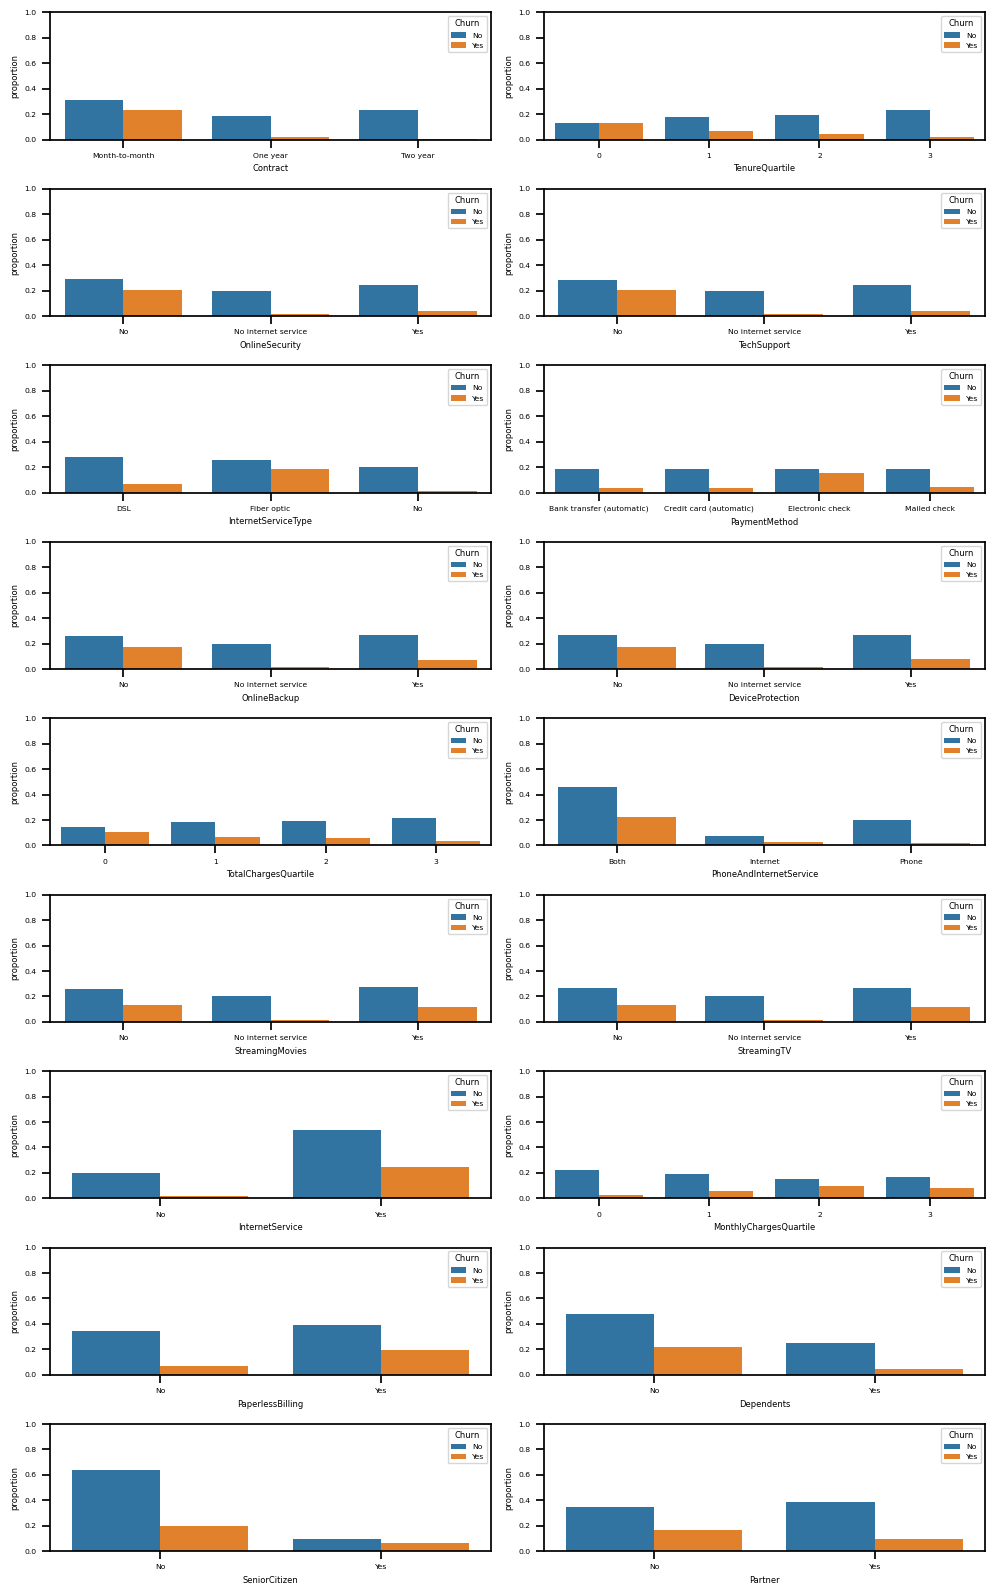

In [12]:
nrows = math.ceil(len(significant_results) / 2)
fig, axs = plt.subplots(nrows=nrows, ncols=2)
fig.set_figwidth(10)
fig.set_figheight(16)
ylim = (0, 1)
ax_row = 0
ax_col = 0
hue_order = sorted(df[target_variable].unique())
for i, feature_stats in enumerate(significant_results):
    feature = feature_stats['feature']
    effect_size_interpretation = feature_stats['interpretation']
    order = sorted(df[feature].unique())
    # 2 axs per row
    ax = axs[ax_row][ax_col]
    # # Ignore returned value to supress text output
    _ = ax.set(ylim=ylim)
    _ = sns.countplot(data=df, x=feature, order=order, hue=target_variable, hue_order=hue_order, stat='proportion', ax=ax)
    if i % 2 == 1:
        ax_row += 1
        ax_col = 0
    else:
        ax_col = 1
fig.tight_layout(pad=1.5)

### Let's examine a couple of features in more detail and form some hypotheses
- We will use the Mann-Whitney U test when examining the difference between 2 groups when the dependent variable is continuous 
    - The Mann-Whitney U test is the non-parametric counterpart to the t-test
- The asterisk annotations added to the plots correspond to the pvalue
    - See convert_pvalue_to_asterisks() in utilities.py
    - More asterisks correspond to lower pvalues
    - ns means not significant

#### Contract
'Contract' had the highest effect size out of the features, but an important question is whether or not this is causal, i.e., does having a contract prevent a customer from 'churning' or is it just that customers who like the service end up signing up for yearly contracts? 

Let's visualize 'Contract' in more detail, step-by-step

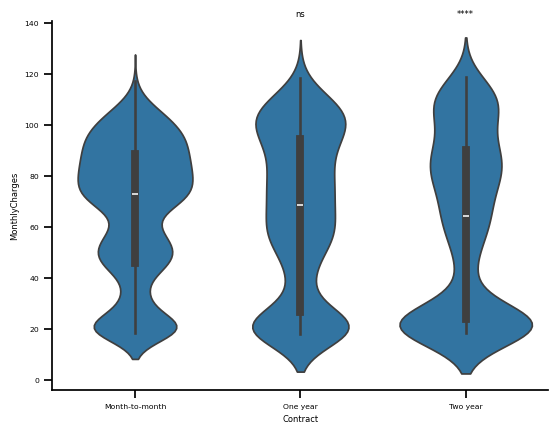

In [13]:
mwu_test_results = []
feature_1 = 'Contract'
feature_2 = 'MonthlyCharges'
# Compare 'Month-to-month' to other values
pairs_to_test = [('Month-to-month', 'One year'), ('Month-to-month', 'Two year')]
for pair in pairs_to_test:
    x = df.loc[df[feature_1] == pair[0]][feature_2]
    y = df.loc[df[feature_1] == pair[1]][feature_2]
    mwu_test_results.append(
        utils.convert_pvalue_to_asterisks(mannwhitneyu(x=x, y=y)[1]))
    
# Explicitly setting the order so we know the pvalue asterisks line up
# with the corresponding value along the x-axis
order = ['Month-to-month', 'One year', 'Two year']
y_text_location = 1.2 * df['MonthlyCharges'].max()
ax = sns.violinplot(data=df, x=feature_1, order=order, y=feature_2)
sns.despine()
for i, pval in enumerate(mwu_test_results):
    # Notice: offsetting i by +1
    _ = ax.text(x=i+1, y=y_text_location, s=pval, horizontalalignment='center')

Although the difference in monthly cost is only significant when comparing 'Month-to-month' with 'Two year', it is interesting that the median montlhy cost is greater for 'Month-to-month' customers.

Let's dissect this further and see if there is difference when we consider if the customer churned as well.

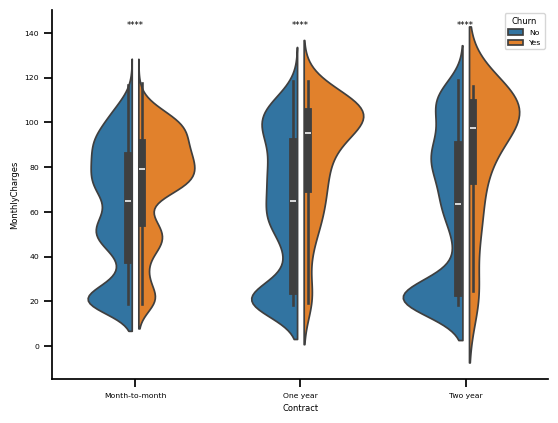

In [14]:
mwu_test_results = []
hue = 'Churn'
hue_order = ['No', 'Yes']
# Compare 'No' churn to 'Yes' churn for each contract type
pairs_to_test = [('No', 'Yes')]
for category in order:
    for pair in pairs_to_test:
        x = df.loc[(df[feature_1] == category) & (df[hue] == pair[0])][feature_2]
        y = df.loc[(df[feature_1] == category) & (df[hue] == pair[1])][feature_2]
        mwu_test_results.append(
            utils.convert_pvalue_to_asterisks(mannwhitneyu(x=x, y=y)[1]))

ax = sns.violinplot(
    data=df, x=feature_1, order=order, y=feature_2, hue=hue, hue_order=hue_order,
    split=True, gap=0.1)
sns.despine()
for i, pval in enumerate(mwu_test_results):
    # Notice: Not offsetting i
    _ = ax.text(x=i, y=y_text_location, s=pval, horizontalalignment='center')

Regardless of contract type, customers who pay more on a monthly basis tend to leave the service more than those with lower monthly costs. 

One problem with this violin plot is that it doesn't take the proportion of observations in each category into account. Let's normalize the violin's width relative to the proportion of observations. 

In [15]:
df[['Contract', 'Churn']].value_counts()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
Two year        No       1647
One year        No       1307
                Yes       166
Two year        Yes        48
Name: count, dtype: int64

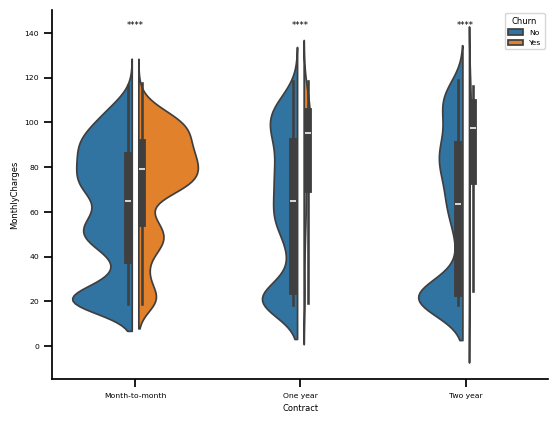

In [16]:
mwu_test_results = []
hue = 'Churn'
hue_order = ['No', 'Yes']
# Compare 'No' churn to 'Yes' churn for each contract type
pairs_to_test = [('No', 'Yes')]
for category in order:
    for pair in pairs_to_test:
        x = df.loc[(df[feature_1] == category) & (df[hue] == pair[0])][feature_2]
        y = df.loc[(df[feature_1] == category) & (df[hue] == pair[1])][feature_2]
        mwu_test_results.append(
            utils.convert_pvalue_to_asterisks(mannwhitneyu(x=x, y=y)[1]))

ax = sns.violinplot(
    data=df, x=feature_1, order=order, y=feature_2, hue=hue, hue_order=hue_order,
    split=True, gap=0.1, density_norm='count')
sns.despine()
for i, pval in enumerate(mwu_test_results):
    # Notice: Not offsetting i
    _ = ax.text(x=i, y=y_text_location, s=pval, horizontalalignment='center')


#### Contract - observations, hypotheses, and questions
- Observations: 
    - Proportionally, customers with month-to-month contracts drop the service (churn) more than customers with yearly contracts
    - Cusotmers with yearly contracts tend to pay less on a monthly basis
    - Customers who pay less on a monthly basis tend keep the service
- Hypotheses to investigate:
    - Locking customers into yearly contracts prevents churning
    - Yearly contracts lower monthly costs which leads to customer retention
    - Customers who like the service and/or enjoy specific features eventually sign up for yearly contracts
- Questions:
    - Are there specific services and/or features that are common among customers who sign up for yearly contracts?
    - Will advertising plans that offer less features but are also less expensive convince customers who are considering dropping the service switch to a cheaper plan instead? 

#### Let's explore any connections between service, features, cost, and churn

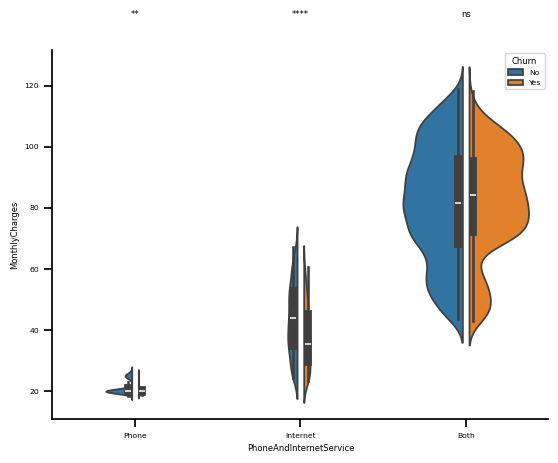

In [17]:
mwu_test_results = []
feature_1 = 'PhoneAndInternetService'
feature_2 = 'MonthlyCharges'
order = ['Phone', 'Internet', 'Both']
y_text_location = 1.2 * df['MonthlyCharges'].max()
hue = 'Churn'
hue_order = ['No', 'Yes']
pairs_to_test = [('No', 'Yes')]
for category in order:
    for pair in pairs_to_test:
        x = df.loc[(df[feature_1] == category) & (df[hue] == pair[0])][feature_2]
        y = df.loc[(df[feature_1] == category) & (df[hue] == pair[1])][feature_2]
        mwu_test_results.append(
            utils.convert_pvalue_to_asterisks(mannwhitneyu(x=x, y=y)[1]))

ax = sns.violinplot(
    data=df, x=feature_1, order=order, y=feature_2, hue=hue, hue_order=hue_order,
    split=True, gap=0.1, density_norm='count')
sns.despine()
for i, pval in enumerate(mwu_test_results):
    # Notice: Not offsetting i
    _ = ax.text(x=i, y=y_text_location, s=pval, horizontalalignment='center')

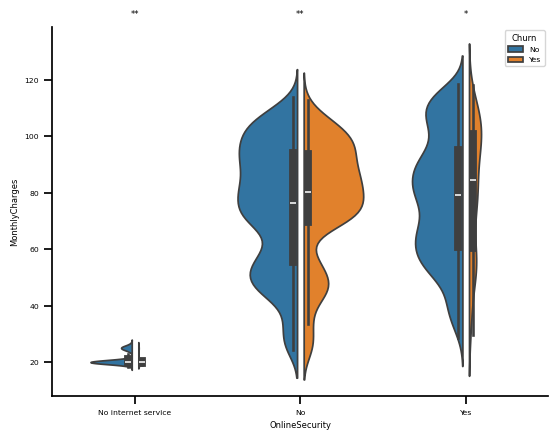

In [18]:
mwu_test_results = []
feature_1 = 'OnlineSecurity'
feature_2 = 'MonthlyCharges'
order = ['No internet service', 'No', 'Yes']
y_text_location = 1.2 * df['MonthlyCharges'].max()
hue = 'Churn'
hue_order = ['No', 'Yes']
pairs_to_test = [('No', 'Yes')]
for category in order:
    for pair in pairs_to_test:
        x = df.loc[(df[feature_1] == category) & (df[hue] == pair[0])][feature_2]
        y = df.loc[(df[feature_1] == category) & (df[hue] == pair[1])][feature_2]
        mwu_test_results.append(
            utils.convert_pvalue_to_asterisks(mannwhitneyu(x=x, y=y)[1]))

ax = sns.violinplot(
    data=df, x=feature_1, order=order, y=feature_2, hue=hue, hue_order=hue_order,
    split=True, gap=0.1, density_norm='count')
sns.despine()
for i, pval in enumerate(mwu_test_results):
    # Notice: Not offsetting i
    _ = ax.text(x=i, y=y_text_location, s=pval, horizontalalignment='center')

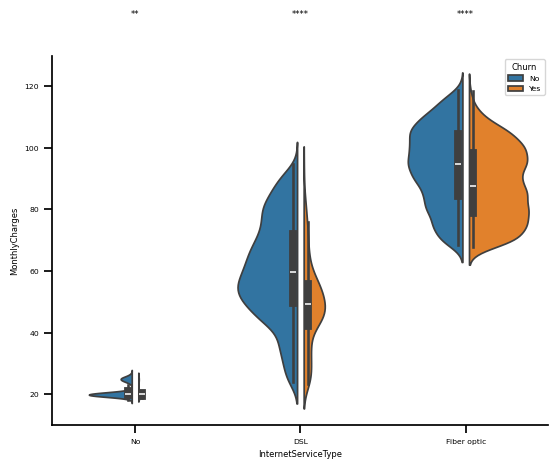

In [19]:
mwu_test_results = []
feature_1 = 'InternetServiceType'
feature_2 = 'MonthlyCharges'
order = ['No', 'DSL', 'Fiber optic']
y_text_location = 1.2 * df['MonthlyCharges'].max()
hue = 'Churn'
hue_order = ['No', 'Yes']
pairs_to_test = [('No', 'Yes')]
for category in order:
    for pair in pairs_to_test:
        x = df.loc[(df[feature_1] == category) & (df[hue] == pair[0])][feature_2]
        y = df.loc[(df[feature_1] == category) & (df[hue] == pair[1])][feature_2]
        mwu_test_results.append(
            utils.convert_pvalue_to_asterisks(mannwhitneyu(x=x, y=y)[1]))

ax = sns.violinplot(
    data=df, x=feature_1, order=order, y=feature_2, hue=hue, hue_order=hue_order,
    split=True, gap=0.1, density_norm='count')
sns.despine()
for i, pval in enumerate(mwu_test_results):
    # Notice: Not offsetting i
    _ = ax.text(x=i, y=y_text_location, s=pval, horizontalalignment='center')

In [20]:
import upsetplot

In [21]:
sig_features = [d['feature'] for d in significant_results]
sig_features

['Contract',
 'TenureQuartile',
 'OnlineSecurity',
 'TechSupport',
 'InternetServiceType',
 'PaymentMethod',
 'OnlineBackup',
 'DeviceProtection',
 'TotalChargesQuartile',
 'PhoneAndInternetService',
 'StreamingMovies',
 'StreamingTV',
 'InternetService',
 'MonthlyChargesQuartile',
 'PaperlessBilling',
 'Dependents',
 'SeniorCitizen',
 'Partner']

In [22]:
categorical_subset_columns = ['Contract', 'OnlineSecurity', 'TechSupport', 'InternetServiceType', 'PaymentMethod', 'Churn']
df_internet_categorical_subset = (df.loc[df['InternetService'] == 'Yes']
                                  .reindex(categorical_subset_columns, axis=1))
for col in df_internet_categorical_subset.columns:
    col_dtype = df_internet_categorical_subset[col].dtype
    unique_values = sorted(df_internet_categorical_subset[col].unique())
    unique_values = ', '.join(map(str, unique_values))
    f'{col}: [{unique_values}]'

'Contract: [Month-to-month, One year, Two year]'

'OnlineSecurity: [No, Yes]'

'TechSupport: [No, Yes]'

'InternetServiceType: [DSL, Fiber optic]'

'PaymentMethod: [Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check]'

'Churn: [No, Yes]'

In [23]:
df_internet_categorical_subset['Month-to-month'] = (df_internet_categorical_subset['Contract']
                                                            .map(lambda x: True if x == 'Month-to-month' else False))
df_internet_categorical_subset['Electronic Check'] = (df_internet_categorical_subset['PaymentMethod']
                                                   .map(lambda x: True if x == 'Electronic check' else False))
df_internet_categorical_subset['Fiber optic'] = (df_internet_categorical_subset['InternetServiceType']
                                                   .map(lambda x: True if x == 'Fiber optic' else False))
df_internet_categorical_subset['No tech support'] = (df_internet_categorical_subset['TechSupport']
                                                   .map(lambda x: True if x == 'No' else False))
df_internet_categorical_subset['No online security'] = (df_internet_categorical_subset['OnlineSecurity']
                                                   .map(lambda x: True if x == 'No' else False))
df_internet_categorical_subset['Churn'] = (df_internet_categorical_subset['Churn']
                                                   .map(lambda x: True if x == 'Yes' else False))

In [24]:
upset_columns = [
    'No online security', 'No tech support',
    'Month-to-month', 'Fiber optic',
    'Electronic Check', 'Churn'
    ]
df_internet_categorical_subset = df_internet_categorical_subset.reindex(upset_columns, axis=1)
df_internet_categorical_subset.head()

,No online security,No tech support,Month-to-month,Fiber optic,Electronic Check,Churn
CustomerID,,,,,,
7590-VHVEG,True,True,True,False,True,False
5575-GNVDE,False,True,False,False,False,False
3668-QPYBK,False,True,True,False,False,True
7795-CFOCW,False,False,False,False,False,False
9237-HQITU,True,True,True,True,True,True


c:\Users\Jonah\.conda\envs\churn-ml-visualization\Lib\site-packages\upsetplot\plotting.py:662: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['black' 'black' 'black' 'black' 'black' 'black' '#0000002e' '#0000002e'
 '#0000002e' '#0000002e' '#0000002e' '#0000002e' 'black' 'black' 'black'
 'black' 'black' '#0000002e' 'black' 'black' 'black' 'black' '#0000002e'
 'black' 'black' 'black' 'black' 'black' '#0000002e' '#0000002e' 'black'
 'black' 'black' '#0000002e' '#0000002e' '#0000002e' '#0000002e'
 '#0000002e' '#0000002e' 'black' '#0000002e' '#0000002e' 'black'
 '#0000002e' '#0000002e' '#0000002e' '#0000002e' '#0000002e' '#0000002e'
 'black' '#0000002e' '#0000002e' '#0000002e' '#0000002e' 'black'
 '#0000002e' '#0000002e' 'black' '#0000002e' '#0000002e' 'black' 'black'
 'black' '#0000002e' 'black' '#0000002e' 'black' 'black' 'black'
 '#0000002e' 'black' 'black' '#0000002e' 'black' 'black' '#0000002e'
 '#0000002e' '#00000

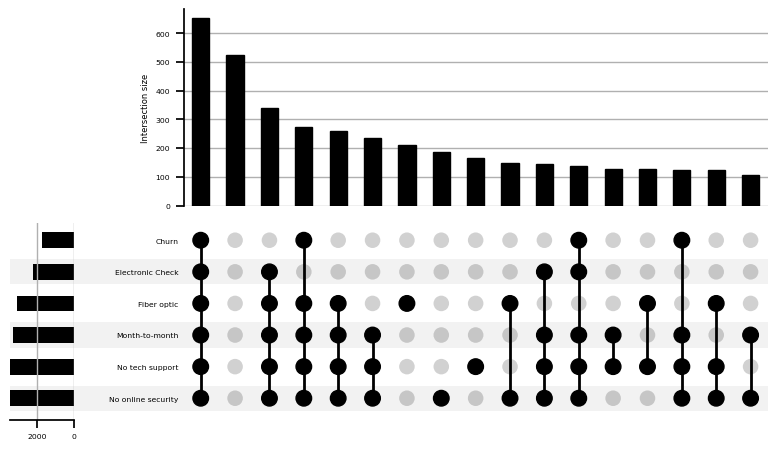

In [25]:
df_upset = upsetplot.from_indicators(df_internet_categorical_subset.columns, data=df_internet_categorical_subset)
upset_plot = upsetplot.UpSet(df_upset, min_subset_size=100, sort_by='cardinality')
upset_plot